#Chargement de données

In [1]:
import pandas as pd
df=pd.read_csv('/content/new_Base_CDM_balanced_V2.csv',sep=';')

In [2]:
#les colonnes de dataset
col_names = df.columns

col_names

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], dtype='object')

In [3]:
#La taille des données
df.shape

(25783, 8)

In [4]:
#Affichage des données
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat


In [5]:
# Supprimer la première ligne du DataFrame
df = df.drop(df.index[0]).reset_index(drop=True)

In [6]:
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
1,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
2,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
3,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
4,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [7]:
# Sélectionnez les colonnes à convertir en format float
cols_to_convert = ['X1', 'X2', 'X3', 'X4', 'X6']

# Convertissez les colonnes sélectionnées en format float
df[cols_to_convert] = df[cols_to_convert].astype(float)

# Affichez le DataFrame

In [8]:
print(df.head())

          Y   X1     X2        X3    X4         X5     X6       X7
0  No_Displ  2.0  20.20   47400.0  36.0       CORA   72.0  No_Feat
1  No_Displ  2.0  11.90   62000.0  24.0    LECLERC   48.0  No_Feat
2  No_Displ  8.0  29.52   60661.0  60.0     AUCHAN  480.0  No_Feat
3  No_Displ  2.0  16.20   59677.0  19.0  CARREFOUR   38.0  No_Feat
4  No_Displ  5.0  62.10  142602.0  50.0       CORA  250.0  No_Feat


In [9]:
#Description des données
rint(df.describe())

                 X1            X2             X3            X4            X6
count  25782.000000  25782.000000   25782.000000  25782.000000  25782.000000
mean      13.767151    130.888312   64641.184431     37.646614    587.855260
std       38.203406    372.649805   54924.645702     23.498949   1821.338396
min        1.000000      1.110000    1693.000000      1.000000      1.000000
25%        2.000000     13.360000   21394.000000     25.000000     50.000000
50%        4.000000     31.050000   51522.000000     32.000000    120.000000
75%       11.000000     87.450000   91000.000000     40.000000    380.000000
max     1475.000000  13589.220000  284844.000000    198.000000  48816.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 0 to 25781
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       25782 non-null  object 
 1   X1      25782 non-null  float64
 2   X2      25782 non-null  float64
 3   X3      25782 non-null  float64
 4   X4      25782 non-null  float64
 5   X5      25782 non-null  object 
 6   X6      25782 non-null  float64
 7   X7      25782 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.6+ MB


In [11]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

df[categorical].head()

There are 3 categorical variables

The categorical variables are : ['Y', 'X5', 'X7']


,Y,X5,X7
0,No_Displ,CORA,No_Feat
1,No_Displ,LECLERC,No_Feat
2,No_Displ,AUCHAN,No_Feat
3,No_Displ,CARREFOUR,No_Feat
4,No_Displ,CORA,No_Feat


In [12]:
#décompte des valeurs uniques pour chaque variable catégorielle
for var in categorical:

    print(df[var].value_counts())

No_Displ    13000
Displ       12782
Name: Y, dtype: int64
CARREFOUR           4629
LECLERC             4257
CASINO              3370
AUCHAN              3003
INTERMARCHE         2701
CORA                1883
CARREFOUR MARKET    1500
SUPER U             1265
SIMPLY MARKET        913
GEANT                761
MONOPRIX             732
MATCH                241
MARCHE U             153
PRISUNIC              99
HYPER U               71
ECOMARCHE             69
OTHERS                60
FRANPRIX              48
SHOPI                 27
Name: X5, dtype: int64
No_Feat    19495
Feat        6287
Name: X7, dtype: int64


Text(0, 0.5, 'X2')

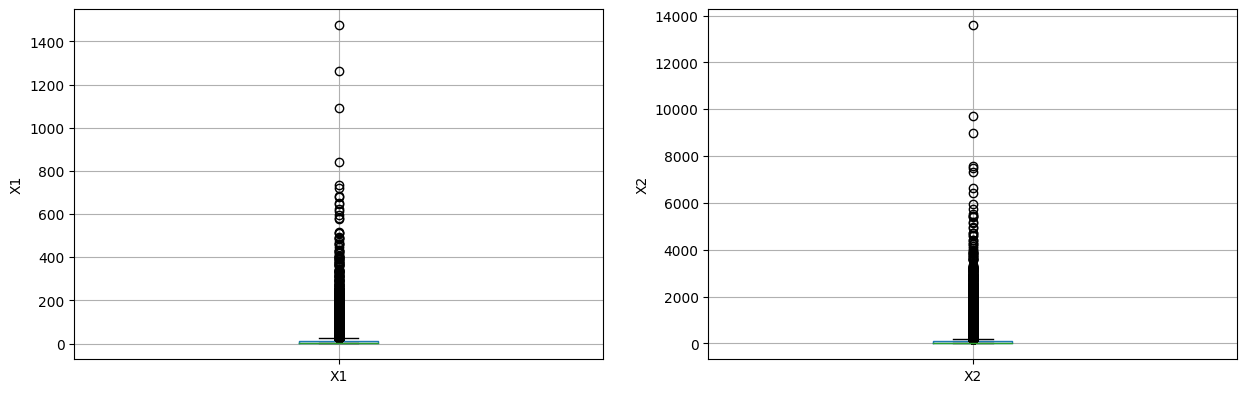

In [ ]:
#Chercher pour les outliers
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='X1')
fig.set_title('')
fig.set_ylabel('X1')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='X2')
fig.set_title('')
fig.set_ylabel('X2')


In [ ]:
# view frequency distribution of categorical variables
import numpy as np

for var in categorical:

    print(df[var].value_counts()/np.float(len(df)))

No_Displ    0.504228
Displ       0.495772
Name: Y, dtype: float64
CARREFOUR           0.179544
LECLERC             0.165115
CASINO              0.130711
AUCHAN              0.116477
INTERMARCHE         0.104763
CORA                0.073035
CARREFOUR MARKET    0.058180
SUPER U             0.049065
SIMPLY MARKET       0.035412
GEANT               0.029517
MONOPRIX            0.028392
MATCH               0.009348
MARCHE U            0.005934
PRISUNIC            0.003840
HYPER U             0.002754
ECOMARCHE           0.002676
OTHERS              0.002327
FRANPRIX            0.001862
SHOPI               0.001047
Name: X5, dtype: float64
No_Feat    0.756148
Feat       0.243852
Name: X7, dtype: float64


<ipython-input-197-947ba65e77a2>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
<ipython-input-197-947ba65e77a2>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
<ipython-input-197-947ba65e77a2>:6: DeprecationWarning: `np.float` is a deprecat

In [ ]:
#cardinalité de chaque variable catégorielle
for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

Y  contains  2  labels
X5  contains  19  labels
X7  contains  2  labels


In [ ]:
# Affichage numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

df[numerical].head()

There are 5 numerical variables

The numerical variables are : ['X1', 'X2', 'X3', 'X4', 'X6']


,X1,X2,X3,X4,X6
0,2.0,20.20,47400.0,36.0,72.0
1,2.0,11.90,62000.0,24.0,48.0
2,8.0,29.52,60661.0,60.0,480.0
3,2.0,16.20,59677.0,19.0,38.0
4,5.0,62.10,142602.0,50.0,250.0


In [ ]:
#Chercher pour les duplications
duplicate = df[df.duplicated()]

In [ ]:
duplicate.shape

(1486, 8)

In [ ]:
# Supprimer les lignes dupliquées du DataFrame
df = df.drop_duplicates()

# Réinitialiser l'index après la suppression des lignes dupliquées
df = df.reset_index(drop=True)

In [ ]:
duplicate = df[df.duplicated()]
duplicate.shape

(0, 8)

In [ ]:
#Affichage des valeurs null
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
dtype: int64

<Axes: xlabel='Y', ylabel='count'>

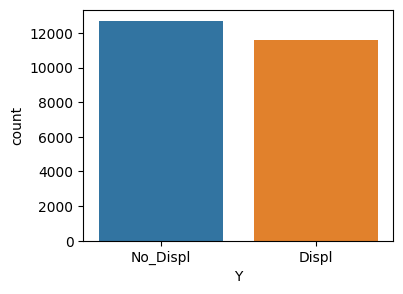

In [ ]:
#Distrubition des classes
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.countplot(x='Y', data=df)

In [ ]:
#Encodage de la  variable X7
df['X7'] = df['X7'].map({'No_Feat': 0, 'Feat': 1})

In [ ]:
# Utilisez la fonction get_dummies de pandas pour appliquer one-hot encoding
df= pd.get_dummies(df, columns=['X5', 'X7'], drop_first=True)

# drop_first=True supprime la première colonne générée pour éviter la colinéarité


In [ ]:
x5_columns = [col for col in df.columns if col.startswith('X5')]

# Display only the columns that start with 'X5'
print(df[x5_columns][:1])

   X5_CARREFOUR  X5_CARREFOUR MARKET  X5_CASINO  X5_CORA  X5_ECOMARCHE  \
0             0                    0          0        1             0   

   X5_FRANPRIX  X5_GEANT  X5_HYPER U  X5_INTERMARCHE  X5_LECLERC  X5_MARCHE U  \
0            0         0           0               0           0            0   

   X5_MATCH  X5_MONOPRIX  X5_OTHERS  X5_PRISUNIC  X5_SHOPI  X5_SIMPLY MARKET  \
0         0            0          0            0         0                 0   

   X5_SUPER U  
0           0  


In [ ]:
df.head()

,Y,X1,X2,X3,X4,X6,X5_CARREFOUR,X5_CARREFOUR MARKET,X5_CASINO,X5_CORA,...,X5_LECLERC,X5_MARCHE U,X5_MATCH,X5_MONOPRIX,X5_OTHERS,X5_PRISUNIC,X5_SHOPI,X5_SIMPLY MARKET,X5_SUPER U,X7_1
0,No_Displ,2.0,20.20,47400.0,36.0,72.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,No_Displ,2.0,11.90,62000.0,24.0,48.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,No_Displ,8.0,29.52,60661.0,60.0,480.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No_Displ,2.0,16.20,59677.0,19.0,38.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,No_Displ,5.0,62.10,142602.0,50.0,250.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(['Y'], axis=1)

y = df['Y']

In [ ]:
#Diviser les données en test et train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((21866, 24), (2430, 24))

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
#effectuer des predictions
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['Displ', 'Displ', 'No_Displ', ..., 'No_Displ', 'No_Displ',
       'No_Displ'], dtype=object)

In [ ]:
#afficher le score de précision du modèle.
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6860


In [ ]:
# check overfitting : print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.6960
Test set score: 0.6860


<Axes: >

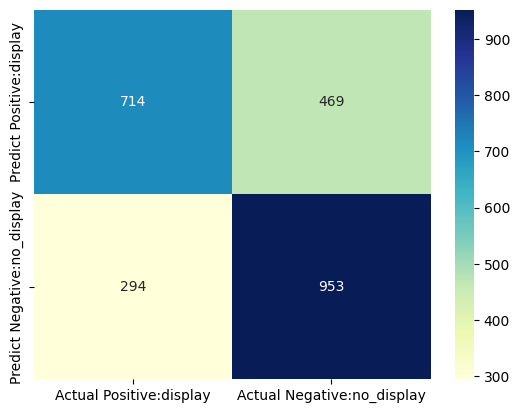

In [ ]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:display', 'Actual Negative:no_display'],
                                 index=['Predict Positive:display', 'Predict Negative:no_display'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#rapport de classification
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       Displ       0.71      0.60      0.65      1183
    No_Displ       0.67      0.76      0.71      1247

    accuracy                           0.69      2430
   macro avg       0.69      0.68      0.68      2430
weighted avg       0.69      0.69      0.68      2430



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3140


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.6036


In [ ]:
#Affichage de false positive
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3298


In [ ]:
#Affichage de true positive
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7083


In [ ]:
import pandas as pd

# Supposons que y_test est votre série ou tableau de labels
class_counts = pd.value_counts(y_test)

# Affichez le compte de chaque classe
print('Compte de chaque classe dans l\'ensemble de test:')
print(class_counts)


Compte de chaque classe dans l'ensemble de test:
No_Displ    1247
Displ       1183
Name: Y, dtype: int64


In [ ]:
#Application de gridsearch sur logistic regression
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

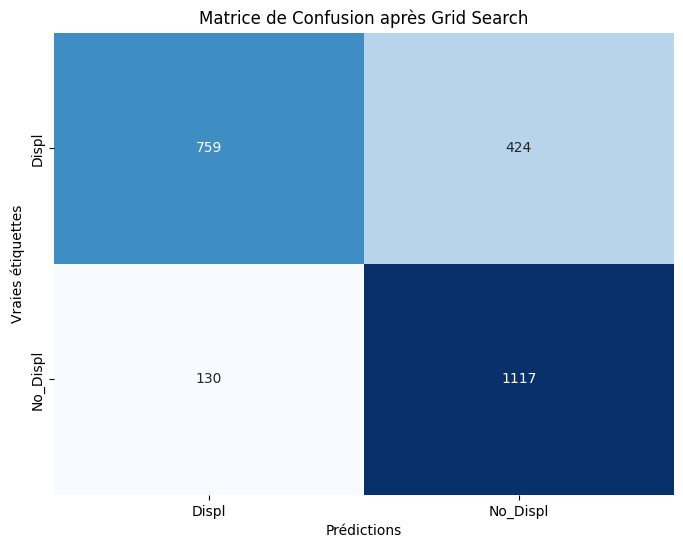

Classification Report après Grid Search:
               precision    recall  f1-score   support

       Displ       0.85      0.64      0.73      1183
    No_Displ       0.72      0.90      0.80      1247

    accuracy                           0.77      2430
   macro avg       0.79      0.77      0.77      2430
weighted avg       0.79      0.77      0.77      2430



In [ ]:
#Matrice de Confusion après Grid Search
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Faire des prédictions sur l'ensemble de test avec le meilleur modèle de la recherche sur grille
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Obtenez les noms de classes
class_names = best_model.classes_

# Affichez la matrice de confusion avec les noms de classes
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.title("Matrice de Confusion après Grid Search")
plt.show()

# Affichez le rapport de classification
print("Classification Report après Grid Search:\n", classification_report(y_test, y_pred))


In [ ]:
!pip install catboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import collections

In [ ]:
classifiers = {
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "CatBoost": CatBoostClassifier()
}

In [ ]:
#Entrainement de classifiers
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Streaming output truncated to the last 5000 lines.
5:	learn: 0.6028022	total: 32.9ms	remaining: 5.45s
6:	learn: 0.5919602	total: 41.2ms	remaining: 5.84s
7:	learn: 0.5824511	total: 46.1ms	remaining: 5.72s
8:	learn: 0.5734504	total: 51.8ms	remaining: 5.7s
9:	learn: 0.5650411	total: 57.6ms	remaining: 5.7s
10:	learn: 0.5575173	total: 63.3ms	remaining: 5.69s
11:	learn: 0.5505463	total: 69.2ms	remaining: 5.7s
12:	learn: 0.5440122	total: 75ms	remaining: 5.69s
13:	learn: 0.5388147	total: 80.4ms	remaining: 5.66s
14:	learn: 0.5329832	total: 88.2ms	remaining: 5.79s
15:	learn: 0.5276492	total: 94.8ms	remaining: 5.83s
16:	learn: 0.5225341	total: 108ms	remaining: 6.24s
17:	learn: 0.5182259	total: 116ms	remaining: 6.35s
18:	learn: 0.5143349	total: 122ms	remaining: 6.28s
19:	learn: 0.5101583	total: 127ms	remaining: 6.21s
20:	learn: 0.5065935	total: 132ms	remaining: 6.17s
21:	learn: 0.5031195	total: 138ms	remaining: 6.14s
22:	learn: 0.5001983	total: 144ms	remaining: 6.12s
23:	learn: 0.4973681	total: 14

In [ ]:
#Confusion matrice de chaque modele de classifier
for key, classifier in classifiers.items():


    # Faites des prédictions sur l'ensemble de test
    y_pred = classifier.predict(X_test)

    # Générez la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)

    print(f"Classifier: {classifier.__class__.__name__}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

Classifier: KNeighborsClassifier
Confusion Matrix:
[[838 345]
 [285 962]]


Classifier: SVC
Confusion Matrix:
[[ 187  996]
 [   7 1240]]


Classifier: DecisionTreeClassifier
Confusion Matrix:
[[925 258]
 [268 979]]


Classifier: CatBoostClassifier
Confusion Matrix:
[[ 911  272]
 [ 119 1128]]




In [ ]:
#Resultat après Gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
import collections

# Définir les modèles et les paramètres spécifiques à la grille
classifiers = {
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}


param_grids = {
    "KNearest": {'classifier__n_neighbors': [3, 5, 7]},
    "Support Vector Classifier": {'classifier__C': [0.1, 1, 10]},
    "DecisionTreeClassifier": {'classifier__max_depth': [None, 10, 20, 30]}
}

# Appliquer la recherche sur grille pour chaque modèle
for key, classifier in classifiers.items():
    # Créer un pipeline avec mise à l'échelle si nécessaire
    if key != "CatBoost":
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', classifier)
        ])
    else:
        pipeline = classifier  # CatBoost gère automatiquement la mise à l'échelle

    # Créer l'objet GridSearchCV
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grids[key], cv=5, scoring='accuracy')

    # Adapter le modèle aux données d'entraînement
    grid_search.fit(X_train, y_train)

    # Afficher les meilleurs paramètres trouvés par la recherche sur grille
    print(f"Meilleurs paramètres pour {key}:", grid_search.best_params_)

    # Faire des prédictions sur l'ensemble de test avec le meilleur modèle
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Évaluer les performances du modèle
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy pour {key}: {accuracy:.3f}')

    # Classification report
    print(f'Classification Report pour {key}:\n', classification_report(y_test, y_pred))

    # Matrice de confusion
    print(f'Confusion Matrix pour {key}:\n', confusion_matrix(y_test, y_pred))


Meilleurs paramètres pour KNearest: {'classifier__n_neighbors': 7}
Accuracy pour KNearest: 0.822
Classification Report pour KNearest:
               precision    recall  f1-score   support

       Displ       0.83      0.79      0.81      1183
    No_Displ       0.81      0.85      0.83      1247

    accuracy                           0.82      2430
   macro avg       0.82      0.82      0.82      2430
weighted avg       0.82      0.82      0.82      2430

Confusion Matrix pour KNearest:
 [[ 938  245]
 [ 188 1059]]
Meilleurs paramètres pour Support Vector Classifier: {'classifier__C': 10}
Accuracy pour Support Vector Classifier: 0.789
Classification Report pour Support Vector Classifier:
               precision    recall  f1-score   support

       Displ       0.87      0.67      0.75      1183
    No_Displ       0.74      0.91      0.82      1247

    accuracy                           0.79      2430
   macro avg       0.81      0.79      0.78      2430
weighted avg       0.80      

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Application de Xgboost
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Appliquer l'encodage aux étiquettes de classe
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convertir les données en matrice DMatrix XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)


In [ ]:
#Xgboost et matrice de confusion matrice et classification report
params = {
    'objective': 'binary:logistic',  # Classification binaire
    'eval_metric': 'logloss',        # Métrique d'évaluation pour la classification binaire
    'eta': 0.3,                      # Taux d'apprentissage
    'max_depth': 6,                  # Profondeur maximale de l'arbre
    'subsample': 0.8,                # Sous-échantillonnage des exemples
    'colsample_bytree': 0.8          # Sous-échantillonnage des colonnes
}

# Entraîner le modèle XGBoost
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Faire des prédictions sur l'ensemble de test
y_pred_proba = xgb_model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convertir les probabilités en prédictions binaires

# Convertir les étiquettes de l'ensemble de test en entiers
y_test_int = (y_test == 'No_Displ').astype(int)

# Évaluer les performances du modèle
# Accuracy
accuracy = accuracy_score(y_test_int, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Classification report
print('Classification Report:\n', classification_report(y_test_int, y_pred))

# Matrice de confusion
print('Confusion Matrix:\n', confusion_matrix(y_test_int, y_pred))


Accuracy: 0.847
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1183
           1       0.82      0.90      0.86      1247

    accuracy                           0.85      2430
   macro avg       0.85      0.85      0.85      2430
weighted avg       0.85      0.85      0.85      2430

Confusion Matrix:
 [[ 940  243]
 [ 129 1118]]


In [ ]:
#resultat de Xgboost après Grid search
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Définir les paramètres à rechercher
param_grid = {
    'objective': ['binary:logistic'],  # Classification binaire
    'eval_metric': ['logloss'],        # Métrique d'évaluation pour la classification binaire
    'eta': [0.3, 0.1, 0.05],           # Taux d'apprentissage
    'max_depth': [6, 8, 10],           # Profondeur maximale de l'arbre
    'subsample': [0.8, 0.9],           # Sous-échantillonnage des exemples
    'colsample_bytree': [0.8, 0.9]     # Sous-échantillonnage des colonnes
}

# Créer une instance de modèle XGBoost
xgb_model = xgb.XGBClassifier()

# Créer une instance de GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)

# Adapter le modèle aux données d'entraînement
grid_search.fit(X_train, y_train_encoded)

# Afficher les meilleurs paramètres trouvés par la recherche sur grille
print("Meilleurs paramètres pour XGBoost:", grid_search.best_params_)

# Afficher la précision pour le meilleur modèle
print("Précision pour XGBoost:", grid_search.best_score_)


Meilleurs paramètres pour XGBoost: {'colsample_bytree': 0.8, 'eta': 0.3, 'eval_metric': 'logloss', 'max_depth': 8, 'objective': 'binary:logistic', 'subsample': 0.9}
Précision pour XGBoost: 0.8346290369224948


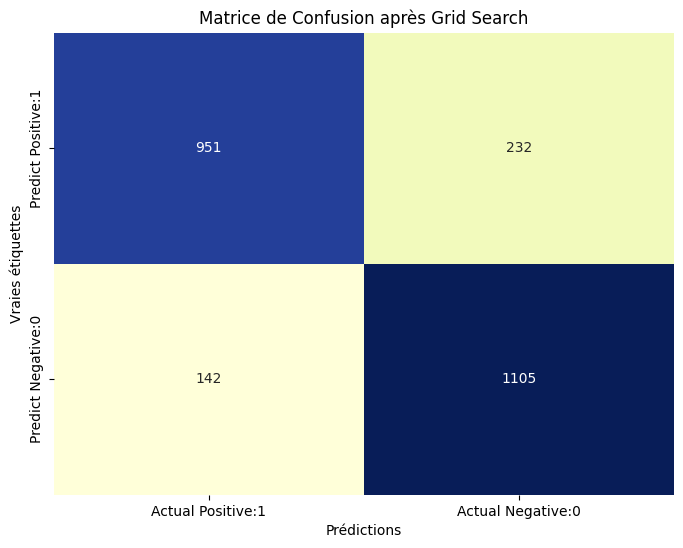

Classification Report après Grid Search:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84      1183
           1       0.83      0.89      0.86      1247

    accuracy                           0.85      2430
   macro avg       0.85      0.85      0.85      2430
weighted avg       0.85      0.85      0.85      2430



In [ ]:
# Convertir les étiquettes de l'ensemble de test en entiers
y_test_int = label_encoder.transform(y_test)

# Faites des prédictions sur l'ensemble de test avec le meilleur modèle
y_pred = best_model.predict(X_test)

# Affichez la matrice de confusion
cm = confusion_matrix(y_test_int, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

# Utilisez seaborn pour créer une heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.title("Matrice de Confusion après Grid Search")
plt.show()

# Affichez le rapport de classification
print("Classification Report après Grid Search:\n", classification_report(y_test_int, y_pred))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Supposons que vous ayez déjà divisé vos données en ensembles d'entraînement et de test (X_train, X_test, y_train, y_test)

# Créez une instance du modèle DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Définissez la grille des hyperparamètres que vous souhaitez explorer
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créez une instance de GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

# Exécutez la recherche sur grille sur l'ensemble d'entraînement
grid_search.fit(X_train, y_train)

# Affichez les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Obtenez le modèle avec les meilleurs paramètres
best_dt_model = grid_search.best_estimator_

# Faites des prédictions sur l'ensemble de test avec le meilleur modèle
y_pred = best_dt_model.predict(X_test)

# Évaluez les performances du modèle avec les meilleurs paramètres
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy avec Grid Search: {accuracy:.3f}')


Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy avec Grid Search: 0.796


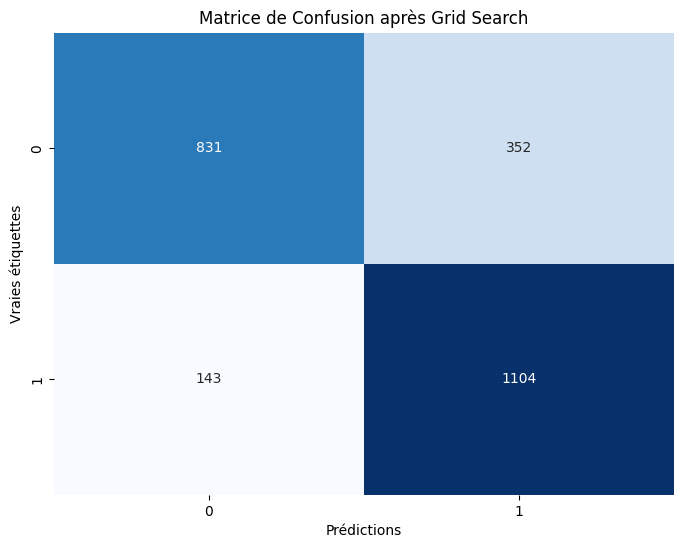

Classification Report après Grid Search:
               precision    recall  f1-score   support

       Displ       0.85      0.70      0.77      1183
    No_Displ       0.76      0.89      0.82      1247

    accuracy                           0.80      2430
   macro avg       0.81      0.79      0.79      2430
weighted avg       0.80      0.80      0.79      2430



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que vous ayez déjà effectué une recherche sur grille et obtenu le meilleur modèle (best_dt_model)

# Faites des prédictions sur l'ensemble de test avec le meilleur modèle
y_pred = best_dt_model.predict(X_test)

# Affichez la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.title("Matrice de Confusion après Grid Search")
plt.show()

# Affichez le rapport de classification
print("Classification Report après Grid Search:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Créer une instance du modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.830
Classification Report:
               precision    recall  f1-score   support

       Displ       0.84      0.80      0.82      1183
    No_Displ       0.82      0.86      0.84      1247

    accuracy                           0.83      2430
   macro avg       0.83      0.83      0.83      2430
weighted avg       0.83      0.83      0.83      2430



<Axes: >

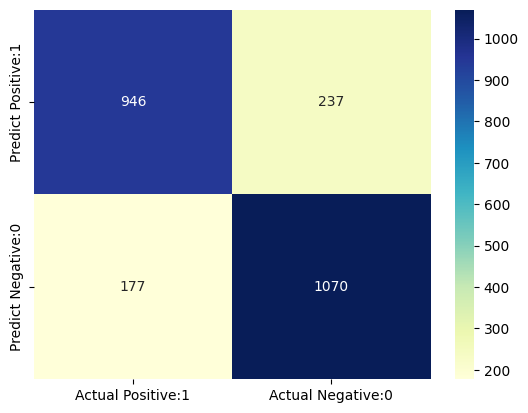

In [ ]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)w
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres que vous souhaitez optimiser
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Exécuter la recherche sur grille sur l'ensemble d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés par la recherche sur grille
print("Meilleurs paramètres pour Random Forest:", grid_search.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Mesurer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy pour Random Forest: {accuracy:.3f}')

# Afficher le rapport de classification
print('Classification Report pour Random Forest:\n', classification_report(y_test, y_pred))

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix pour Random Forest:\n', cm)


Meilleurs paramètres pour Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy pour Random Forest: 0.829
Classification Report pour Random Forest:
               precision    recall  f1-score   support

       Displ       0.85      0.78      0.82      1183
    No_Displ       0.81      0.87      0.84      1247

    accuracy                           0.83      2430
   macro avg       0.83      0.83      0.83      2430
weighted avg       0.83      0.83      0.83      2430

Confusion Matrix pour Random Forest:
 [[ 927  256]
 [ 159 1088]]
